In [77]:
import re
import urllib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

EX. 1

In [19]:
txt_file = """Rose    416-333-4444    rose@someplace.com
Martha  905-888-1234    martha@hotmail.com
Donna   647-222-9876    donna@rogers.ca
Amy 905-777-2222    amy@gmail.com"""

In [21]:
l = txt_file.split("\n")
print l

['Rose    416-333-4444    rose@someplace.com', 'Martha  905-888-1234    martha@hotmail.com', 'Donna   647-222-9876    donna@rogers.ca', 'Amy 905-777-2222    amy@gmail.com']


In [25]:
for s in l:
    a = re.search("[A-Z]\S*", s).group()
    b = re.search("\d{3}-\d{3}-\d{4}", s).group()
    print a, b

Rose 416-333-4444
Martha 905-888-1234
Donna 647-222-9876
Amy 905-777-2222


EX. 2

In [13]:
y = re.compile("^[a-z]{5,8}$")

In [18]:
print bool(y.match("antynatalizm"))
print bool(y.match("janpawel"))
print bool(y.match("drugi"))
print bool(y.match("Dzieci"))
print bool(y.match("OOO0OO"))
print bool(y.match("sdfdsdsd"))
print bool(y.match("anti5zm"))

False
True
True
False
False
True
False


In [4]:
x = re.compile("^[A-Z][a-z]*$")

In [12]:
print bool(x.match("Alfabet"))
print bool(x.match("AlfaBetaGamma"))
print bool(x.match("B"))
print bool(x.match(""))
print bool(x.match("b"))
print bool(x.match("A8"))

True
False
True
False
False
False


EX.3

In [26]:
import urllib2

In [28]:
url = "https://en.wikipedia.org/wiki/Administrative_divisions_of_Mexico"

In [33]:
response = urllib2.urlopen(url)

In [34]:
s = response.read()
print s

<!DOCTYPE html>
<html lang="en" dir="ltr" class="client-nojs">
<head>
<meta charset="UTF-8"/>
<title>Administrative divisions of Mexico - Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Administrative_divisions_of_Mexico","wgTitle":"Administrative divisions of Mexico","wgCurRevisionId":718243186,"wgRevisionId":718243186,"wgArticleId":87990,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Spanish-language sources (es)","Use mdy dates from December 2014","Articles containing Spanish-language text","Subdivisions of Mexico","Lists of country subdivisions","Country subdivisions of the Americas","Mexico geography-related lists",

In [44]:
ll = re.findall("Abbrevations\sfor\sthe\sstates\sof\sMexico[\s\S]*Zacatecas</a></td>", s)
len(ll)
print ll[0]

Abbrevations for the states of Mexico</b></caption>
<tr style="background:#e8e8e8;">
<th><b>Name of federative entity</b></th>
<th><b>Conventional</b><br />
<b>abbreviation</b></th>
<th><b>2-letter code*</b></th>
<th><b>3-letter code</b><br />
(<a href="/wiki/ISO_3166-2:MX" title="ISO 3166-2:MX">ISO 3166-2:MX</a>)</th>
</tr>
<tr style="background:#efefef;">
<td style="text-align:left;"><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Aguascalientes.svg/23px-Flag_of_Aguascalientes.svg.png" width="23" height="13" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Aguascalientes.svg/35px-Flag_of_Aguascalientes.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Aguascalientes.svg/46px-Flag_of_Aguascalientes.svg.png 2x" data-file-width="350" data-file-height="200" />&#160;</span><a href="/wiki/Aguascalientes" title="Aguascalientes">Aguascalientes</a></td>
<td>Ags.</td>
<td>MX - AG<

In [49]:
state_names = re.findall("title=\"[A-Z][a-z]*\">[A-Za-z]*<", ll[0])
state_names = [re.sub("^[\s\S]*>", "", re.sub("<", "", s)) for s in state_names]
print state_names

['Aguascalientes', 'Campeche', 'Chiapas', 'Coahuila', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Jalisco', 'Morelos', 'Nayarit', 'Oaxaca', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Zacatecas']


In [53]:
flags = re.findall("src=\"[\S]*png", ll[0])
flags = [re.sub("src=\"//", "", s) for s in flags]
for a in flags: print a;

upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Aguascalientes.svg/23px-Flag_of_Aguascalientes.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Baja_California.svg/23px-Flag_of_Baja_California.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Baja_California_Sur.svg/23px-Flag_of_Baja_California_Sur.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/3/37/Flag_of_Campeche.svg/23px-Flag_of_Campeche.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Chiapas.svg/23px-Flag_of_Chiapas.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Chihuahua.svg/23px-Flag_of_Chihuahua.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Flag_of_Coahuila.svg/23px-Flag_of_Coahuila.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/5/52/Flag_of_Colima.svg/23px-Flag_of_Colima.svg.png
upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Flag_of_Mexican_Federal_District.svg/23px-Flag_of_Mexican_Federal_District.svg.png
upload.wikimedi

In [76]:
flags_local = [re.sub("/", "", re.search("/[^/]*$", image_url).group()) for image_url in flags]

In [55]:
codes = re.findall("<td>[A-Z]{2}\s-\s[A-Z]{2}</td>", ll[0])
codes = [re.sub("<[\S]{1,2}d>", "", s) for s in codes]
print codes

['MX - AG', 'MX - BN', 'MX - BS', 'MX - CM', 'MX - CP', 'MX - CH', 'MX - CA', 'MX - CL', 'MX - DF', 'MX - DU', 'MX - GT', 'MX - GR', 'MX - HI', 'MX - JA', 'MX - MX', 'MX - MC', 'MX - MR', 'MX - NA', 'MX - NL', 'MX - OA', 'MX - PU', 'MX - QE', 'MX - QR', 'MX - SL', 'MX - SI', 'MX - SO', 'MX - TB', 'MX - TM', 'MX - TL', 'MX - VE', 'MX - YU']


In [78]:
for imurl, imlcph in zip(flags, flags_local):
    urllib.urlretrieve("https://" + imurl, imlcph)

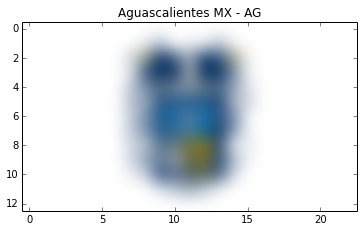

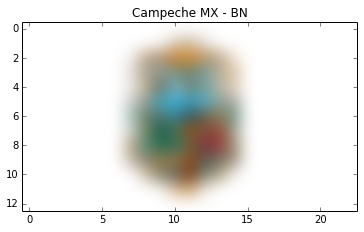

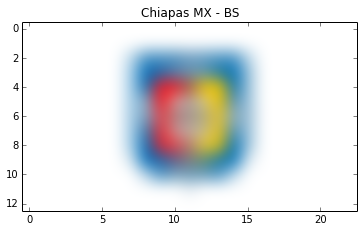

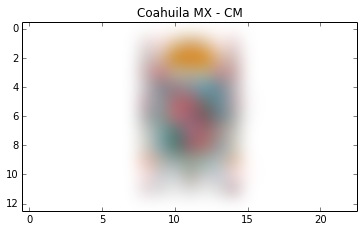

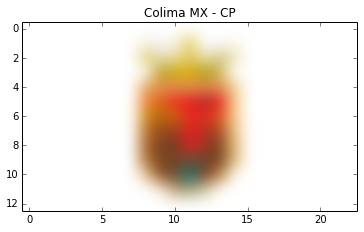

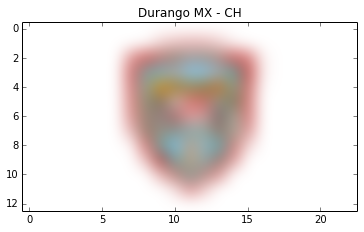

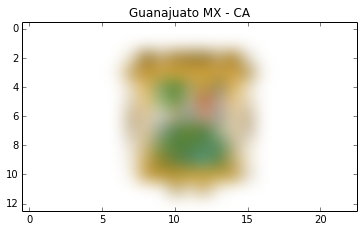

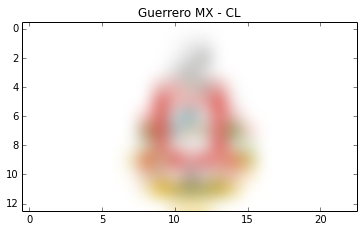

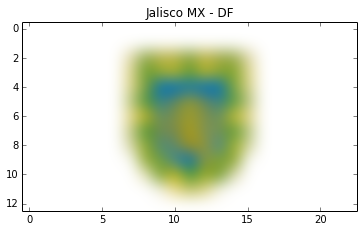

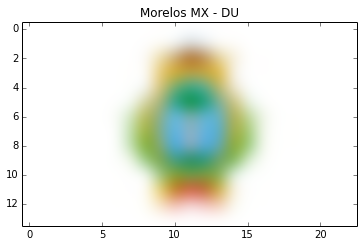

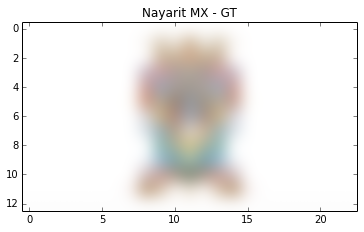

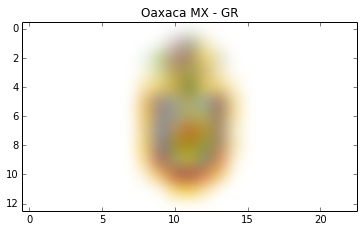

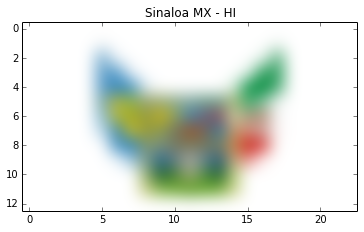

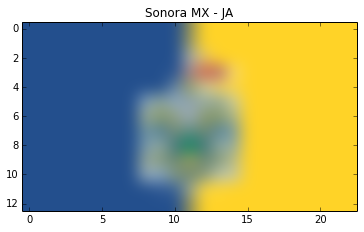

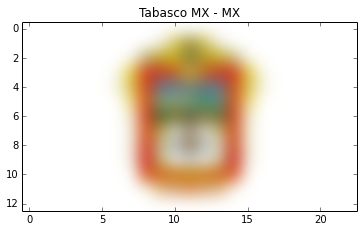

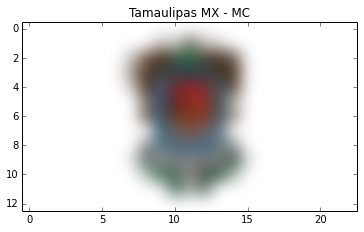

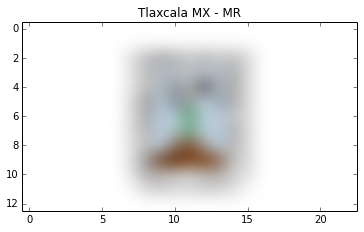

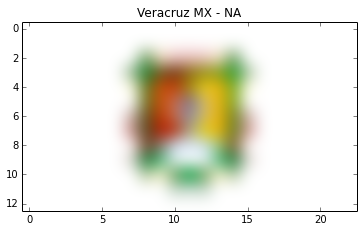

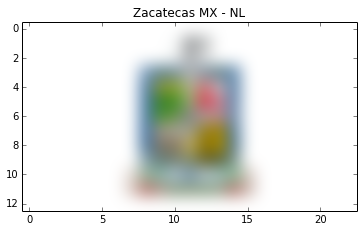

In [82]:
for name, code, imlcph in zip(state_names, codes, flags_local):
    img = mpimg.imread(imlcph)
    plt.imshow(img,interpolation="bicubic")
    plt.title(name + " " + code)
    plt.show()
